In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Get the data

In [107]:
 data = pd.read_csv("D:/quikr_car.csv")

# CLean the Data

In [108]:
data['year'] = data['year'].astype(str)
data['kms_driven'] = data['kms_driven'].dropna()
data['fuel_type'] = data['fuel_type'].dropna()
data = data[data['year'].str.isnumeric()]
data['year'] = data['year'].astype(int)

In [109]:
data['Price'].unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [110]:
data = data[data['Price']!='Ask For Price']
data['Price'] = data['Price'].str.replace(',','').astype(int)
data['kms_driven'] = data['kms_driven'].str.split(' ').str.get(0).str.replace(',','')

data = data[data['kms_driven'].str.isnumeric()]

data['kms_driven'] = data['kms_driven'].astype(int)

In [111]:
data['fuel_type'].dropna()
data[data['fuel_type']=='nan']

,name,company,year,Price,kms_driven,fuel_type


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int32 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [113]:
data['name'] = data['name'].str.split(' ').str.slice(0,3).str.join(' ')

In [114]:
cleaned_data = data

cleaned_data.to_csv('cleaned_data_quikr.csv')

# Load The Clean Dataset

In [2]:
df = pd.read_csv('cleaned_data_quikr.csv')

In [3]:
df_clean = df.drop(columns=['Unnamed: 0'],errors='ignore')
df_clean = df_clean.drop(columns=['Unnamed: 0.1'],errors='ignore')

# Visualise the data

C:\Users\DELL\AppData\Local\Temp\ipykernel_26176\1971757949.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(data=df, x='company', y='Price', ci=None)


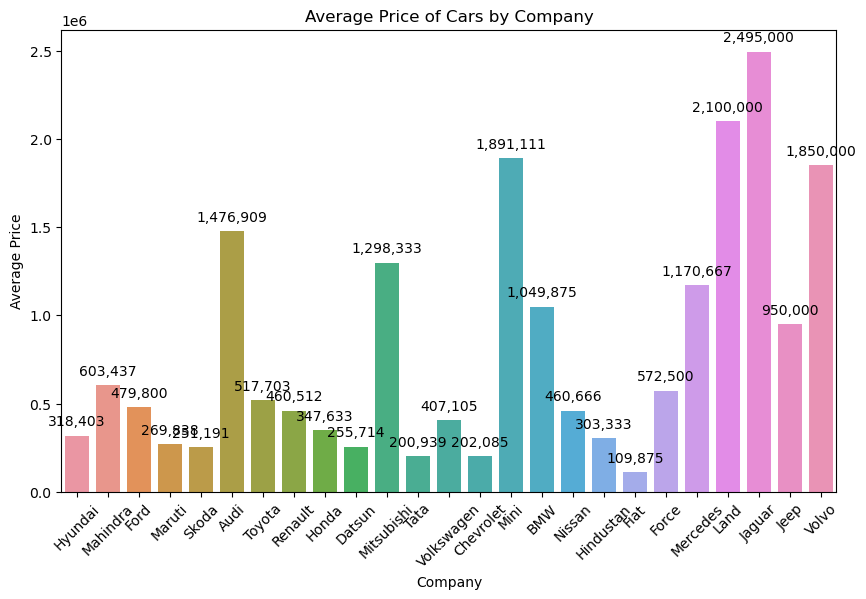

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=df, x='company', y='Price', ci=None)
plt.title('Average Price of Cars by Company')
plt.xlabel('Company')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():,.0f}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=10, color='black', 
                      xytext=(0, 5),  
                      textcoords='offset points')
plt.show()


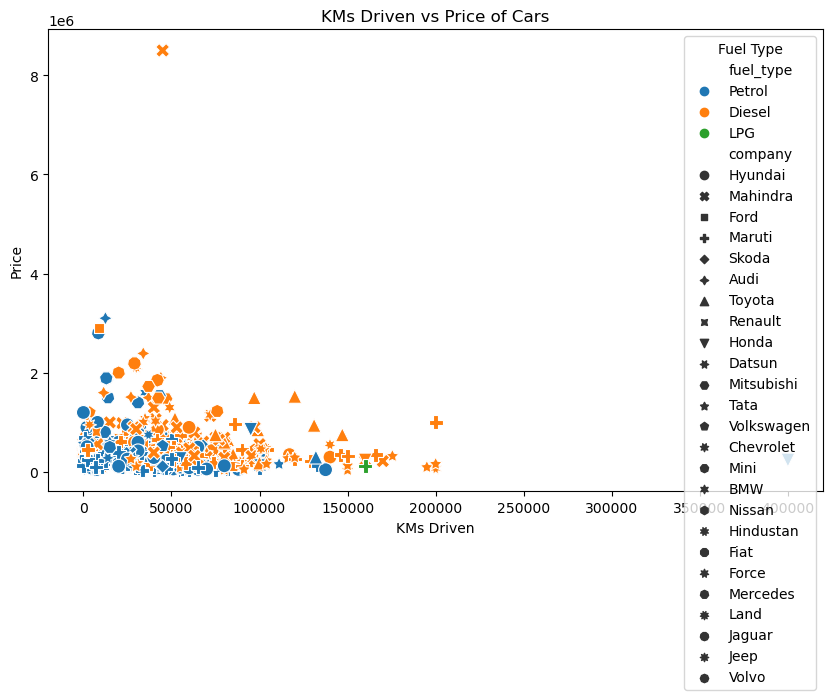

In [127]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='kms_driven', y='Price', hue='fuel_type', style='company', s=100)
plt.title('KMs Driven vs Price of Cars')
plt.xlabel('KMs Driven')
plt.ylabel('Price')
plt.legend(title='Fuel Type')
plt.show()

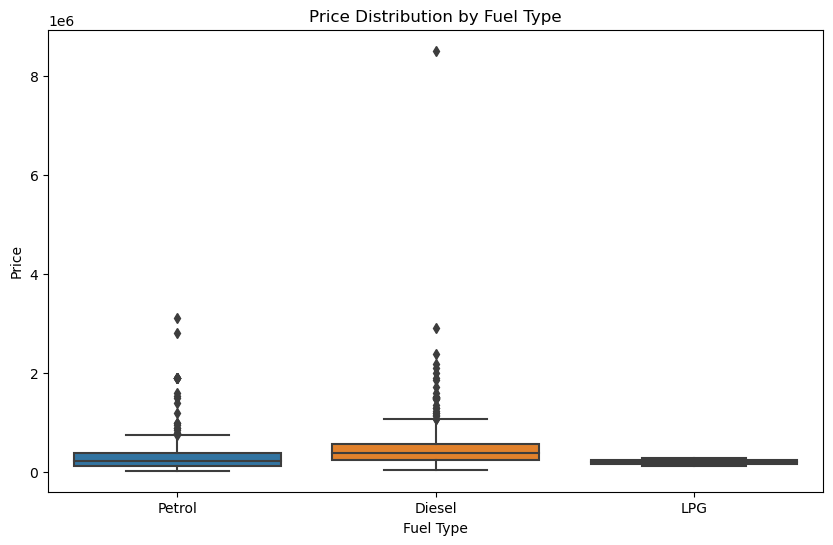

In [128]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='fuel_type', y='Price')
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

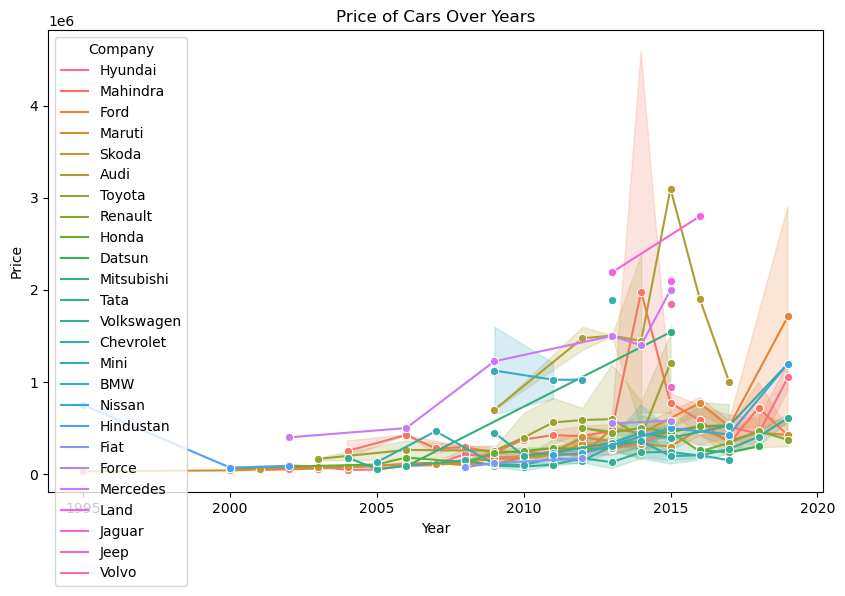

In [129]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='Price', marker='o', hue='company')
plt.title('Price of Cars Over Years')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(title='Company')
plt.show()

# Preprocess The data

In [4]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df_clean['fuel_type'] = imputer.fit_transform(df_clean[['fuel_type']]).ravel()

# Encoding the Categorical data

In [5]:
encoded_company = LabelEncoder()
encoded_fuel = LabelEncoder()

In [6]:
encoded_company.fit(df_clean['company'])

LabelEncoder()

In [7]:
encoded_fuel.fit(df_clean['fuel_type'])

LabelEncoder()

In [8]:
df_clean['company'] = encoded_company.transform(df_clean['company'])

In [9]:
df_clean['fuel_type'] = encoded_fuel.transform(df_clean['fuel_type'])

# Model Fitting Without Name

In [10]:
X = df_clean[['company','year','kms_driven','fuel_type']]
y = df_clean['Price']

In [11]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
model = RandomForestRegressor()

In [13]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [14]:
pred = model.predict(x_test)

In [43]:
data = {
    'company':['Volvo'],
    'year':[2015],
    'kms_driven':[42000],
    'fuel_type':['Petrol']
}

In [44]:
new = pd.DataFrame(data)

In [45]:
new['company'] = encoded_company.transform(new['company'])

In [46]:
new['fuel_type'] = encoded_fuel.transform(new['fuel_type'])

In [47]:
predicted = model.predict(new)

In [48]:
predicted

array([480714.87])

In [51]:
df[(df['company'] == 'Mahindra') & (df['kms_driven'] >= 40000)]

,Unnamed: 0.1,Unnamed: 0,name,company,year,Price,kms_driven,fuel_type
11,11,13,Mahindra Scorpio SLE,Mahindra,2015,320000,48660,Diesel
16,16,18,Mahindra Scorpio S10,Mahindra,2016,350000,43000,Diesel
18,18,20,Mahindra Scorpio S10,Mahindra,2016,350000,43000,Diesel
29,29,31,Mahindra Scorpio S10,Mahindra,2015,250000,48508,Diesel
50,50,52,Mahindra Scorpio S10,Mahindra,2015,250000,48508,Diesel
78,78,81,Mahindra Scorpio VLX,Mahindra,2014,699000,50000,Diesel
150,150,155,Mahindra Scorpio VLX,Mahindra,2011,499999,66000,Diesel
163,163,168,Mahindra Scorpio VLX,Mahindra,2014,699000,50000,Diesel
169,169,174,Mahindra Scorpio S10,Mahindra,2015,900000,97200,Diesel
170,170,175,Mahindra XUV500,Mahindra,2014,699999,52000,Diesel


In [52]:
mae = mean_absolute_error(y_test,pred)

In [53]:
mae

185951.92697096404

,Unnamed: 0.1,Unnamed: 0,name,company,year,Price,kms_driven,fuel_type
652,652,692,Volvo S80 Summum,Volvo,2015,1850000,42000,Diesel


In [42]:
new

,company,year,kms_driven,fuel_type
0,24,2015,42000,0


In [49]:
import joblib as jb

In [50]:
jb.dump(model,'ml_assign.pkl')

['ml_assign.pkl']

In [52]:
jb.dump(encoded_company,'encoded_company.pkl')
jb.dump(encoded_fuel,'encoded_fuel.pkl')

['encoded_fuel.pkl']

In [53]:
encoded_name = LabelEncoder()

In [54]:
encoded_name.fit(df_clean['name'])

LabelEncoder()

In [55]:
df_clean['name'] = encoded_name.transform(df_clean['name'])

In [61]:
x = ['Ford Figo']
encoded_name.transform(x)

array([45])

# Model Fitting With Name

In [63]:
A = df_clean[['name','company','year','kms_driven','fuel_type']]
b = df_clean['Price']

In [64]:
a_train,a_test,b_train,b_test = train_test_split(A,b,test_size=0.2,random_state=42)

In [66]:
a_model = RandomForestRegressor()

In [67]:
a_model.fit(a_train,b_train)

RandomForestRegressor()

In [68]:
pred = a_model.predict(a_test)

In [69]:
pred

array([ 137704.97      ,  139350.09      ,  287619.06      ,
        546729.66      ,  208199.05666667,  409719.96      ,
        177749.99      ,  667049.94      ,   83983.93      ,
        319424.84      ,  347489.99      ,  441187.22666667,
        841439.93      ,  151769.8       ,  324480.        ,
         76601.08      ,  292409.87      ,  298729.95      ,
        247599.97      ,  576145.66      ,  463724.88      ,
        130240.        ,  980769.65      ,  409539.8       ,
        283549.76      ,  266940.        ,  451649.97      ,
        631109.97      ,  306758.72      ,  648598.86      ,
        351699.99      ,  891054.94      ,  732999.93      ,
        476201.53      ,  347416.83      ,  118599.99      ,
        769654.98      ,   63299.91      ,  492377.93      ,
        303108.3       ,  173332.19      ,  565779.66      ,
        351196.84      ,  807829.97      ,  631109.97      ,
        234586.        ,  255409.94      ,  329190.        ,
        222660.        ,

In [80]:
data = {
    'name':['Ford EcoSport'],
    'company':['Ford'],
    'year':[2015],
    'kms_driven':[42000],
    'fuel_type':['Petrol']
}
dff = pd.DataFrame(data)

In [81]:
dff['name'] = encoded_name.transform(dff['name'])

In [82]:
dff['company'] = encoded_company.transform(dff['company'])

In [83]:
dff['fuel_type'] = encoded_fuel.transform(dff['fuel_type'])

In [84]:
v = a_model.predict(dff)

In [85]:
v

array([439839.5])

In [87]:
df[df['name'] == 'Ford EcoSport']

,Unnamed: 0.1,Unnamed: 0,name,company,year,Price,kms_driven,fuel_type
80,80,83,Ford EcoSport,Ford,2017,489999,39000,Petrol
148,148,153,Ford EcoSport,Ford,2017,489999,39000,Petrol


In [88]:
df

,Unnamed: 0.1,Unnamed: 0,name,company,year,Price,kms_driven,fuel_type
0,0,0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,1,1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,2,3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,3,4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,4,6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...,...,...
812,812,883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
813,813,885,Tata Indica V2,Tata,2009,110000,30000,Diesel
814,814,886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
815,815,888,Tata Zest XM,Tata,2018,260000,27000,Diesel


# comparing mae with and without name

# With name - 164618.3748628049
#Without name - 185951.92697096404

In [93]:
mae_a = mean_absolute_error(b_test,pred)

In [94]:
mae_a

164618.3748628049

In [95]:
jb.dump(a_model,'a_model.pkl')

['a_model.pkl']

In [96]:
jb.dump(encoded_name,'encoded_name.pkl')

['encoded_name.pkl']

In [105]:
df

,Unnamed: 0.1,Unnamed: 0,name,company,year,Price,kms_driven,fuel_type
0,0,0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,1,1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,2,3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,3,4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,4,6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...,...,...
812,812,883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
813,813,885,Tata Indica V2,Tata,2009,110000,30000,Diesel
814,814,886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
815,815,888,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [100]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [104]:
df_clean

,name,company,year,Price,kms_driven,fuel_type
0,91,9,2007,80000,45000,2
1,118,13,2006,425000,40,0
2,88,9,2014,325000,28000,2
3,40,6,2014,575000,36000,0
4,45,6,2012,175000,41000,0
...,...,...,...,...,...,...
812,159,14,2011,270000,50000,2
813,203,21,2009,110000,30000,0
814,231,22,2009,300000,132000,2
815,229,21,2018,260000,27000,0
